# Assignment

Write digit 0-9 on paper.

Take photograph of each digit

load each digit as shape (20,20) in gray

Using the k=4 with the highest accuracy (Train:Test = 2:1).

Test your images and compare the predictions

In [106]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = '../samples/data/digits.png'
imgGray = cv.imread(filename, cv.IMREAD_GRAYSCALE)

print(imgGray.shape)

#### get all the digits
IMG_SIZE = 20

rowNum = imgGray.shape[0] / IMG_SIZE
colNum = imgGray.shape[1] / IMG_SIZE

rows = np.vsplit(imgGray, rowNum)

digits = []
for row in rows:
    rowCells = np.hsplit(row, colNum)
    for digit in rowCells:
        digits.append(digit)

# convert list to np.array
digits = np.array(digits)
print('digits', digits.shape)

# labels
DIGITS_CLASS = 10
repeatNum = len(digits) / DIGITS_CLASS
labels = np.repeat(np.arange(DIGITS_CLASS), repeatNum)
print('labels', labels.shape)

#### get features
features = []
for digit in digits:
    img_pixel = np.float32(digit.flatten())
    features.append(img_pixel)

features = np.squeeze(features)
print('features', features.shape)

# shuffle features and labels
# seed random for constant random value
rand = np.random.RandomState(321)
shuffle = rand.permutation(features.shape[0])
features, labels = features[shuffle], labels[shuffle]

# split into training and testing 
splitRatio = [2, 1]
sumRatio = sum(splitRatio)
partition = np.array(splitRatio) * len(features) // sumRatio
partition = np.cumsum(partition)

featureTrain, featureTest = np.array_split(features, partition[:-1])
labelTrain, labelTest = np.array_split(labels, partition[:-1])

print('featureTrain', featureTrain.shape)
print('featureTest', featureTrain.shape)
print('labelTrain', labelTrain.shape)
print('labelTest', labelTest.shape)

# Train the KNN model:
print('Training KNN model\n')
knn = cv.ml.KNearest_create()
knn.train(featureTrain, cv.ml.ROW_SAMPLE, labelTrain)

# Test the created model:

k = 4

ret,prediction, neighbours, dist = knn.findNearest(featureTest, k)
# Compute the accuracy:
                                                   
accuracy = (np.squeeze(prediction) == labelTest).mean() * 100
print(f'K={k} Accuracy  : {accuracy}\n')

(1000, 2000)
digits (5000, 20, 20)
labels (5000,)
features (5000, 400)
featureTrain (3333, 400)
featureTest (3333, 400)
labelTrain (3333,)
labelTest (1667,)
Training KNN model

K=4 Accuracy  : 93.94121175764847



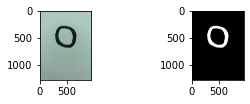

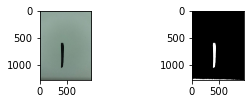

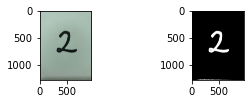

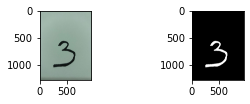

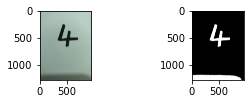

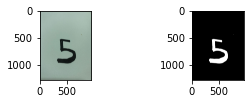

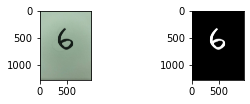

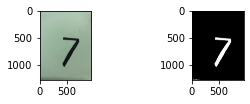

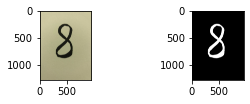

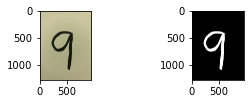

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

j=1

for i in range(0,10):
    img = cv.imread(f'../essential/assets/{i}.jpg')
    #imgA = cv.resize(img,(28,28))
    imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, threshImg = cv.threshold(imgGray, 105, 255, cv.THRESH_BINARY_INV)

    plt.figure(figsize=(5,15))
    
    plt.subplot(10,2,j)
    imgRGB = img[:,:,::-1]
    plt.imshow(imgRGB)

    plt.subplot(10,2,j+1)
    imgtest = cv.cvtColor(threshImg,cv.COLOR_GRAY2RGB)
    plt.imshow(imgtest)
    plt.show()
